In [39]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchviz import make_dot
import torch.optim as optim

In [4]:
sample_data1 = np.array([
    [166, 58.7],
    [176, 75.7],
    [171, 62.1],
    [173, 70.4],
    [169, 60.1],
])
print(sample_data1)

[[166.   58.7]
 [176.   75.7]
 [171.   62.1]
 [173.   70.4]
 [169.   60.1]]


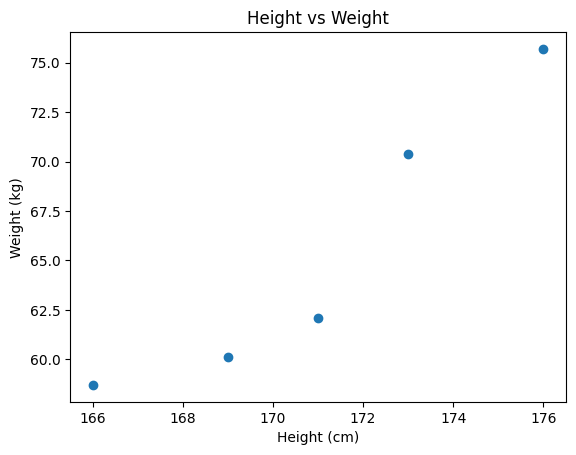

In [6]:
x = sample_data1[:, 0]
y = sample_data1[:, 1]

plt.scatter(x, y)
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title('Height vs Weight')
plt.show()

Text(0.5, 1.0, 'Height vs Weight')

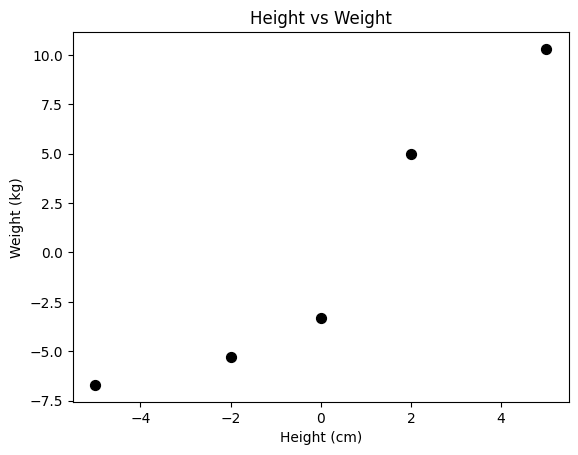

In [24]:
X = x - x.mean()
Y = y - y.mean()
plt.scatter(X, Y, c='k', s=50)
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title('Height vs Weight')

In [25]:
X = torch.tensor(X).float()
Y = torch.tensor(Y).float()
print(X)
print(Y)

tensor([-5.,  5.,  0.,  2., -2.])
tensor([-6.7000, 10.3000, -3.3000,  5.0000, -5.3000])


In [26]:
W = torch.tensor(1.0, requires_grad=True).float()
B = torch.tensor(1.0, requires_grad=True).float()

In [27]:
def pred(X):
    return W * X + B

Yp = pred(X)
print(Yp)

tensor([-4.,  6.,  1.,  3., -1.], grad_fn=<AddBackward0>)


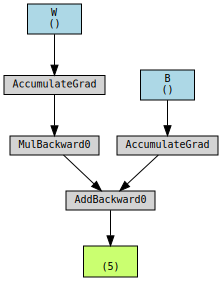

In [28]:
params = {'W': W, 'B': B}
g= make_dot(Yp, params=params)
display(g)

In [29]:
def mse(Yp, Y):
    loss = ((Yp - Y)**2).mean()
    return loss

In [30]:
loss = mse(Yp, Y)
print(loss)

tensor(13.3520, grad_fn=<MeanBackward0>)


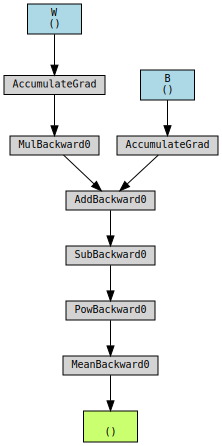

In [31]:
params = {'W': W, 'B': B}
g= make_dot(loss, params=params)
display(g)

In [32]:
loss.backward()
print(W.grad)
print(B.grad)

tensor(-19.0400)
tensor(2.0000)


In [34]:
lr = 0.001

with torch.no_grad():
    W -= W.grad * lr
    B -= B.grad * lr

    W.grad.zero_()
    B.grad.zero_()

print(W)
print(B)
print(W.grad)
print(B.grad)

tensor(1.0190, requires_grad=True)
tensor(0.9980, requires_grad=True)
tensor(0.)
tensor(0.)


In [35]:
W = torch.tensor(1.0, requires_grad=True).float()
B = torch.tensor(1.0, requires_grad=True).float()

num_epochs = 500

lr = 0.001

history = np.zeros((0, 2))

for epoch in range(num_epochs):
    Yp = pred(X)
    loss = mse(Yp, Y)

    loss.backward()

    with torch.no_grad():
        W -= lr * W.grad
        B -= lr * B.grad

        W.grad.zero_()
        B.grad.zero_()
    
    if epoch % 10 ==0:
        item = np.array([epoch, loss.item()])
        history = np.vstack((history, item))
        print(f'Epoch {epoch} Loss {loss.item()}')

Epoch 0 Loss 13.352002143859863
Epoch 10 Loss 10.38550853729248
Epoch 20 Loss 8.517291069030762
Epoch 30 Loss 7.3363823890686035
Epoch 40 Loss 6.585766792297363
Epoch 50 Loss 6.104706764221191
Epoch 60 Loss 5.792664527893066
Epoch 70 Loss 5.586757659912109
Epoch 80 Loss 5.447643756866455
Epoch 90 Loss 5.350703239440918
Epoch 100 Loss 5.280527114868164
Epoch 110 Loss 5.2274627685546875
Epoch 120 Loss 5.185458183288574
Epoch 130 Loss 5.150716304779053
Epoch 140 Loss 5.120848178863525
Epoch 150 Loss 5.094348907470703
Epoch 160 Loss 5.070261478424072
Epoch 170 Loss 5.047978401184082
Epoch 180 Loss 5.027107238769531
Epoch 190 Loss 5.007390022277832
Epoch 200 Loss 4.988657474517822
Epoch 210 Loss 4.970790386199951
Epoch 220 Loss 4.953707695007324
Epoch 230 Loss 4.937346458435059
Epoch 240 Loss 4.92165994644165
Epoch 250 Loss 4.906609058380127
Epoch 260 Loss 4.892160415649414
Epoch 270 Loss 4.8782877922058105
Epoch 280 Loss 4.864964008331299
Epoch 290 Loss 4.85216760635376
Epoch 300 Loss 4.83

In [36]:
print('W = ', W.data.numpy())
print('B: ', B.data.numpy())

print(f'初期状態： 損失：{history[0,1]:.4f}')
print(f'最終状態： 損失：{history[-1,1]:.4f}')

W =  1.820683
B:  0.3675114
初期状態： 損失：13.3520
最終状態： 損失：4.6796


Text(0.5, 1.0, 'Loss vs. Epoch')

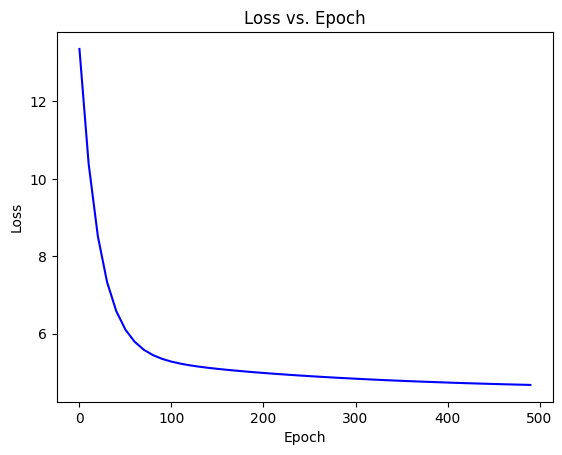

In [38]:
plt.plot(history[:, 0], history[:, 1], 'b')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')

In [45]:
W = torch.tensor(1.0, requires_grad=True).float()
B = torch.tensor(1.0, requires_grad=True).float()

num_epochs = 500

lr = 0.001

history = np.zeros((0, 2))

optimizer = optim.SGD([W, B], lr=lr)

for epoch in range(num_epochs):
    Yp = pred(X)
    loss = mse(Yp, Y)

    loss.backward()

    optimizer.step()
    optimizer.zero_grad()
    
    if epoch % 10 ==0:
        item = np.array([epoch, loss.item()])
        history = np.vstack((history, item))
        print(f'Epoch {epoch} Loss {loss.item()}')

Epoch 0 Loss 13.352002143859863
Epoch 10 Loss 10.38550853729248
Epoch 20 Loss 8.517291069030762
Epoch 30 Loss 7.3363823890686035
Epoch 40 Loss 6.585766792297363
Epoch 50 Loss 6.104706764221191
Epoch 60 Loss 5.792664527893066
Epoch 70 Loss 5.586757659912109
Epoch 80 Loss 5.447643756866455
Epoch 90 Loss 5.350703239440918
Epoch 100 Loss 5.280527114868164
Epoch 110 Loss 5.2274627685546875
Epoch 120 Loss 5.185458183288574
Epoch 130 Loss 5.150716304779053
Epoch 140 Loss 5.120848178863525
Epoch 150 Loss 5.094348907470703
Epoch 160 Loss 5.070261478424072
Epoch 170 Loss 5.047978401184082
Epoch 180 Loss 5.027107238769531
Epoch 190 Loss 5.007390022277832
Epoch 200 Loss 4.988657474517822
Epoch 210 Loss 4.970790386199951
Epoch 220 Loss 4.953707695007324
Epoch 230 Loss 4.937346458435059
Epoch 240 Loss 4.92165994644165
Epoch 250 Loss 4.906609058380127
Epoch 260 Loss 4.892160415649414
Epoch 270 Loss 4.8782877922058105
Epoch 280 Loss 4.864964008331299
Epoch 290 Loss 4.85216760635376
Epoch 300 Loss 4.83

In [46]:
W = torch.tensor(1.0, requires_grad=True).float()
B = torch.tensor(1.0, requires_grad=True).float()

num_epochs = 500

lr = 0.001

history2 = np.zeros((0, 2))

optimizer = optim.SGD([W, B], lr=lr, momentum=0.9)

for epoch in range(num_epochs):
    Yp = pred(X)
    loss = mse(Yp, Y)

    loss.backward()

    optimizer.step()
    optimizer.zero_grad()
    
    if epoch % 10 ==0:
        item = np.array([epoch, loss.item()])
        history2 = np.vstack((history2, item))
        print(f'Epoch {epoch} Loss {loss.item()}')

Epoch 0 Loss 13.352002143859863
Epoch 10 Loss 5.758540153503418
Epoch 20 Loss 5.954119682312012
Epoch 30 Loss 5.027565956115723
Epoch 40 Loss 4.8578081130981445
Epoch 50 Loss 4.705231189727783
Epoch 60 Loss 4.632656097412109


Epoch 70 Loss 4.594036102294922
Epoch 80 Loss 4.5698370933532715
Epoch 90 Loss 4.557379722595215
Epoch 100 Loss 4.549499034881592
Epoch 110 Loss 4.545222282409668
Epoch 120 Loss 4.542612075805664
Epoch 130 Loss 4.541136741638184
Epoch 140 Loss 4.54025936126709
Epoch 150 Loss 4.5397515296936035
Epoch 160 Loss 4.53945255279541
Epoch 170 Loss 4.539279460906982
Epoch 180 Loss 4.539178371429443
Epoch 190 Loss 4.53911828994751
Epoch 200 Loss 4.539084434509277
Epoch 210 Loss 4.539063453674316
Epoch 220 Loss 4.539051532745361
Epoch 230 Loss 4.5390448570251465
Epoch 240 Loss 4.539040565490723
Epoch 250 Loss 4.53903865814209
Epoch 260 Loss 4.539036750793457
Epoch 270 Loss 4.539035320281982
Epoch 280 Loss 4.539035320281982
Epoch 290 Loss 4.539034366607666
Epoch 300 Loss 4.539034366607666
Epoch 310 Loss 4.539034843444824
Epoch 320 Loss 4.539033889770508
Epoch 330 Loss 4.539034843444824
Epoch 340 Loss 4.539034843444824
Epoch 350 Loss 4.539034843444824
Epoch 360 Loss 4.539034843444824
Epoch 370 Loss

Text(0.5, 1.0, 'Loss vs. Epoch')

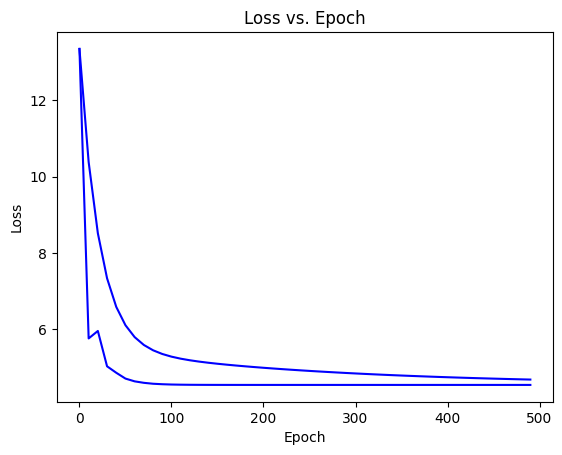

In [47]:
plt.plot(history[:, 0], history[:, 1], 'b')
plt.plot(history2[:, 0], history2[:, 1], 'b')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')